In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_excel("20230503_3.3_Tagesaufgaben_Datensatz.xlsx")
df.head()

,Geschlecht,Berufsbranche,Alter,Einkommen im Jahr
0,1,Offentliche Dienst,24,51056
1,1,Offentliche Dienst,41,114530
2,0,Medienbranche,34,51905
3,1,Handel,29,57005
4,1,Banken,19,97708


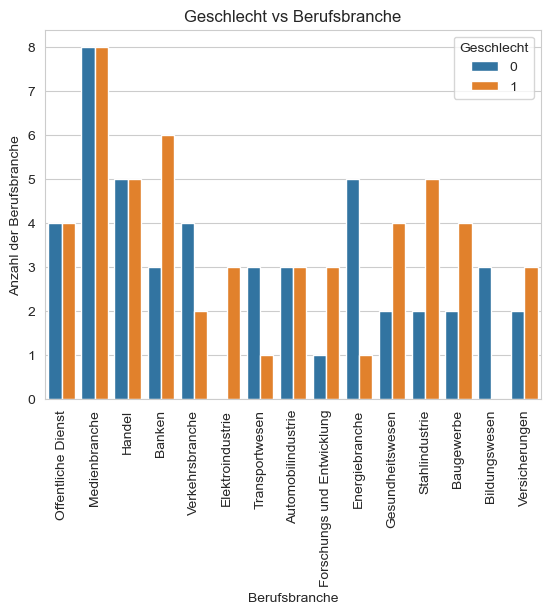

In [21]:
ax = sns.countplot(x='Berufsbranche', hue='Geschlecht', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Geschlecht vs Berufsbranche")
plt.xlabel("Berufsbranche")
plt.ylabel("Anzahl der Berufsbranche")
plt.show()

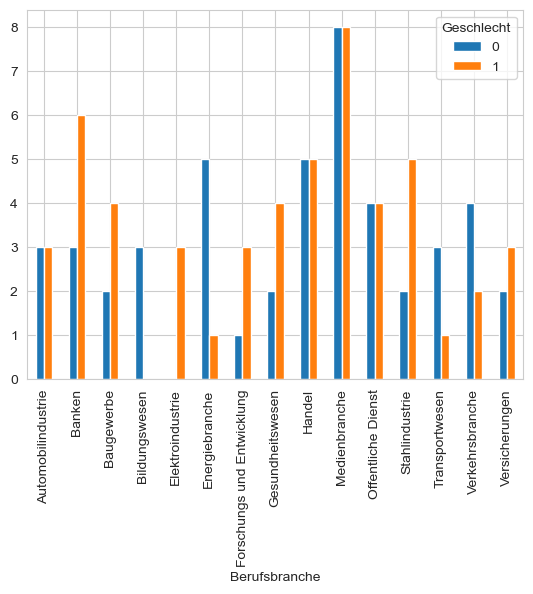

In [18]:
# alternativ
pd.crosstab(df['Berufsbranche'],df['Geschlecht']).plot.bar();


***

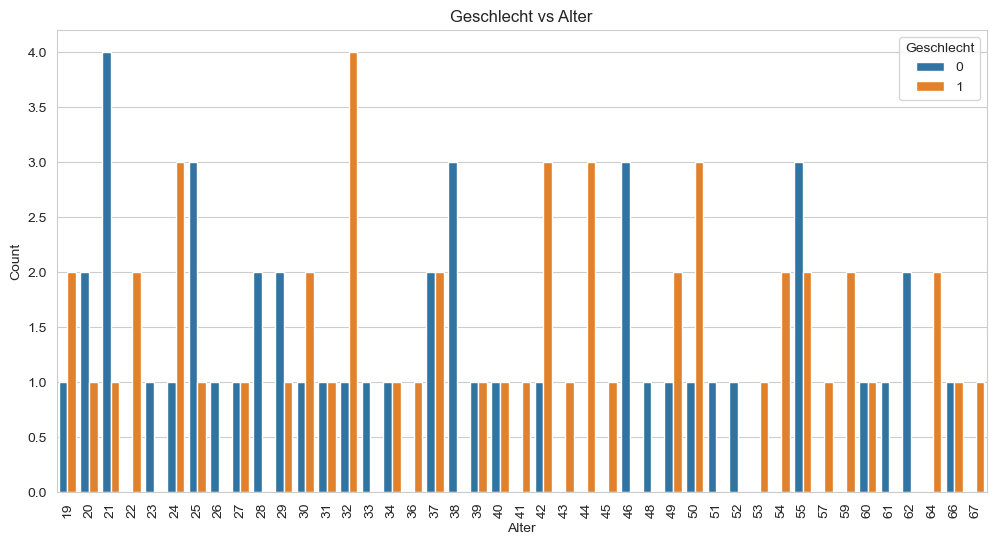

In [15]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='Alter', hue='Geschlecht', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Geschlecht vs Alter")
plt.xlabel("Alter")
plt.ylabel("Count")
plt.show()

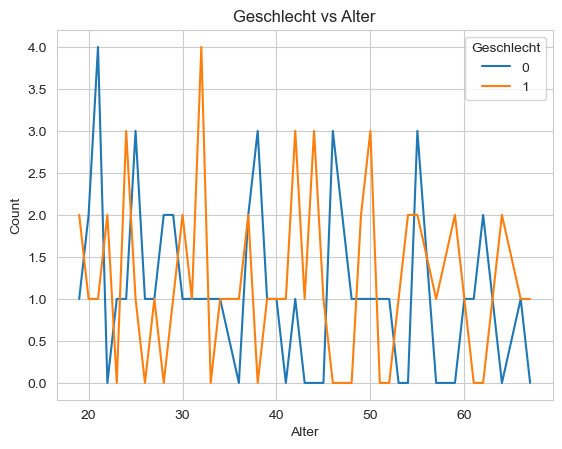

In [20]:
pd.crosstab(df['Alter'],df['Geschlecht']).plot.line()
plt.title("Geschlecht vs Alter")
plt.xlabel("Alter")
plt.ylabel("Count")
plt.show()

***

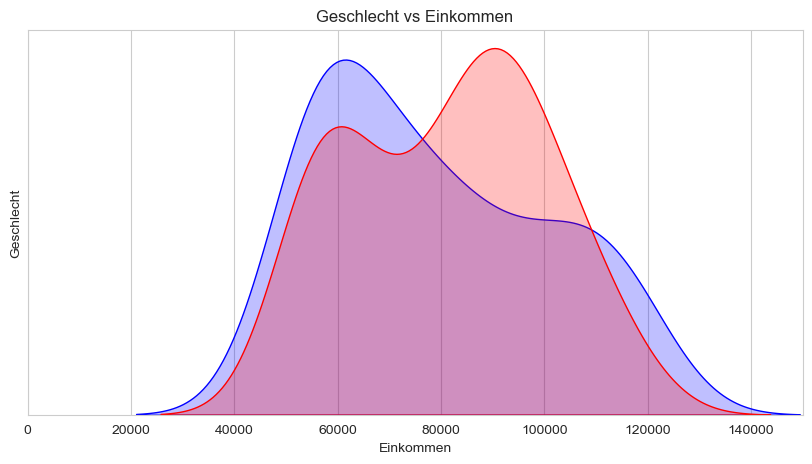

In [27]:
fig = plt.figure(figsize=(10, 5))
male_only = df[df['Geschlecht'] == 1]
female_only = df[df['Geschlecht'] == 0]


ax = sns.kdeplot(male_only['Einkommen im Jahr'], color ='Blue', label='Male', shade=True)
ax = sns.kdeplot(female_only['Einkommen im Jahr'], color='Red', label='Female', shade=True)

plt.yticks([])
plt.title('Geschlecht vs Einkommen')
plt.ylabel('Geschlecht')
plt.xlabel('Einkommen')
plt.xlim(0, 150000)
plt.show()

***

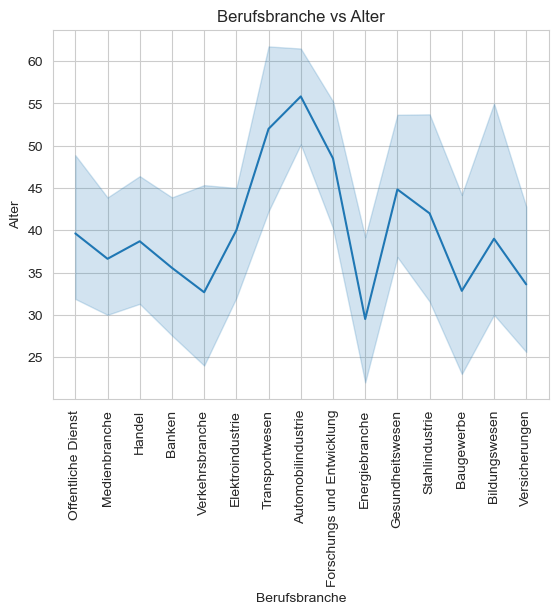

In [29]:
ax = sns.lineplot(df, x="Berufsbranche", y="Alter")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Berufsbranche vs Alter")
plt.xlabel("Berufsbranche")
plt.ylabel("Alter")
plt.show()

***

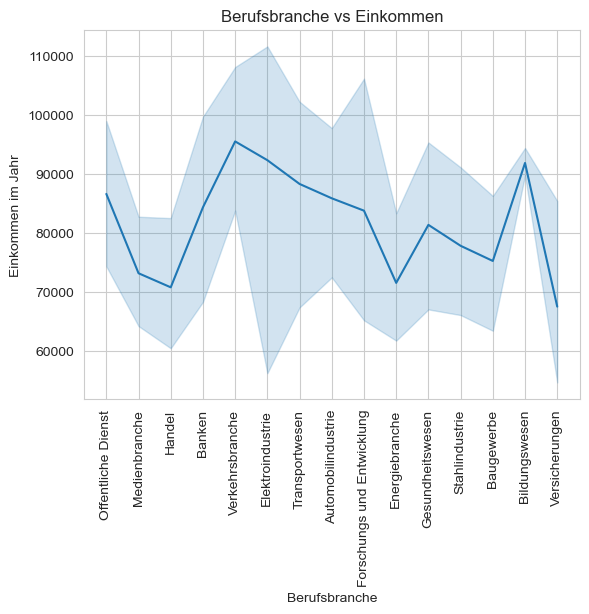

In [32]:
ax = sns.lineplot(df, x="Berufsbranche", y="Einkommen im Jahr")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Berufsbranche vs Einkommen")
plt.xlabel("Berufsbranche")
plt.ylabel("Einkommen im Jahr")
plt.show()


***

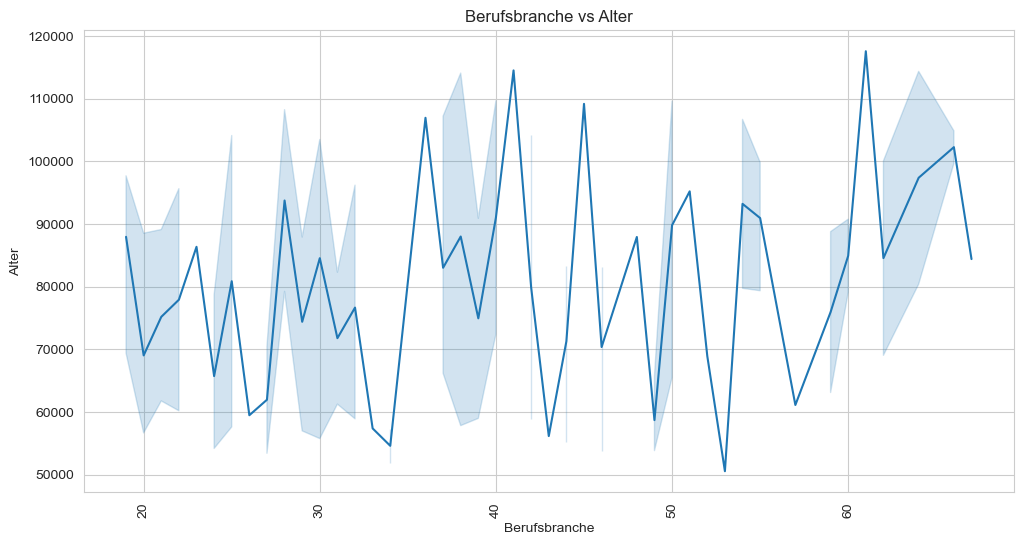

In [34]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(df, x="Alter", y="Einkommen im Jahr")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Berufsbranche vs Alter")
plt.xlabel("Berufsbranche")
plt.ylabel("Alter")
plt.show()